In [6]:
import pandas as pd
import numpy as np 
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


In [7]:
data = pd.read_csv('mcdonalds.csv')
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [9]:
print(data.shape)
print(data.columns.values)

(1453, 15)
['yummy' 'convenient' 'spicy' 'fattening' 'greasy' 'fast' 'cheap' 'tasty'
 'expensive' 'healthy' 'disgusting' 'Like' 'Age' 'VisitFrequency' 'Gender']


In [12]:
md_x=np.array(data.iloc[:,0:11])
md_x=(md_x == "Yes").astype(int)
np.round(np.mean(md_x,axis=0),2)

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [19]:
data.iloc[:,:11] = data.iloc[:,:11].replace( {'Yes': 1,'No': 0})
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [21]:
data.info

<bound method DataFrame.info of       yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting          Like  Age      VisitFrequency  \
0           

In [22]:
data.describe()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


In [23]:
data.iloc[:,:11].to_numpy()

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [24]:
data['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
r = data.iloc[:,:11]
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [25]:
missing_values = data.isna().sum().sort_values() #finding the missing values in the dataset
missing_values

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

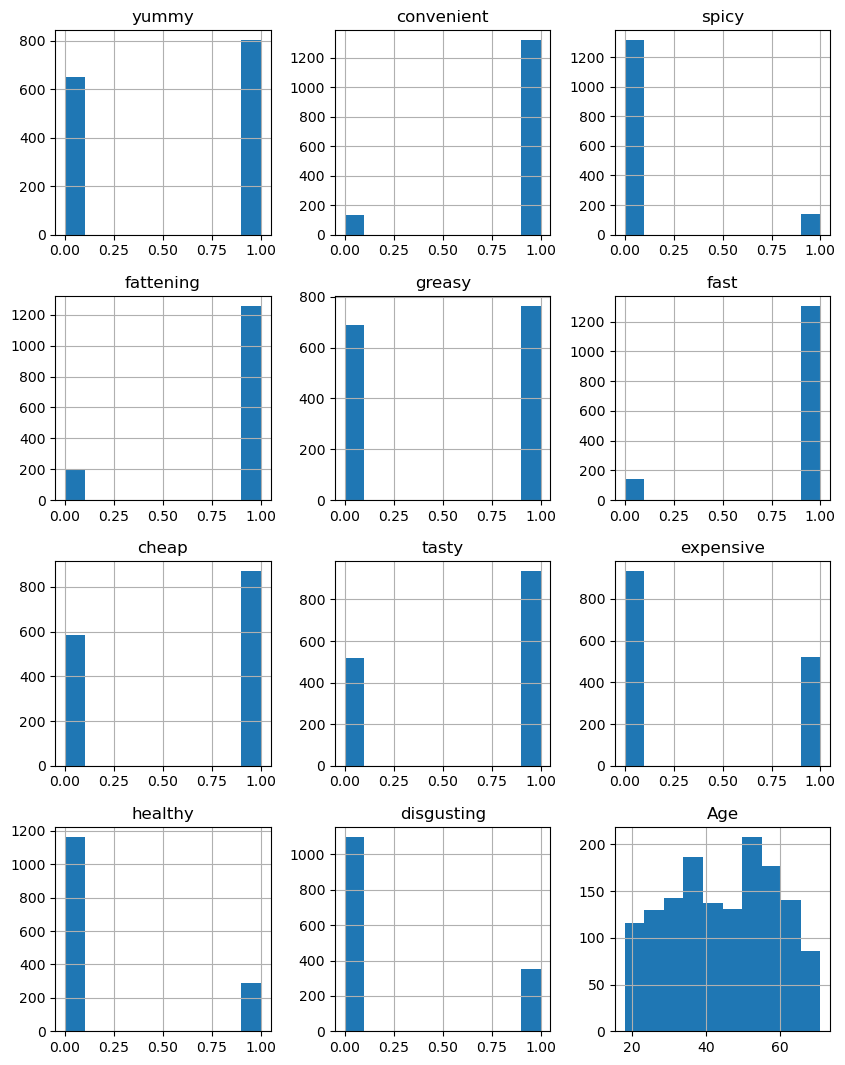

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,13)
data.hist()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

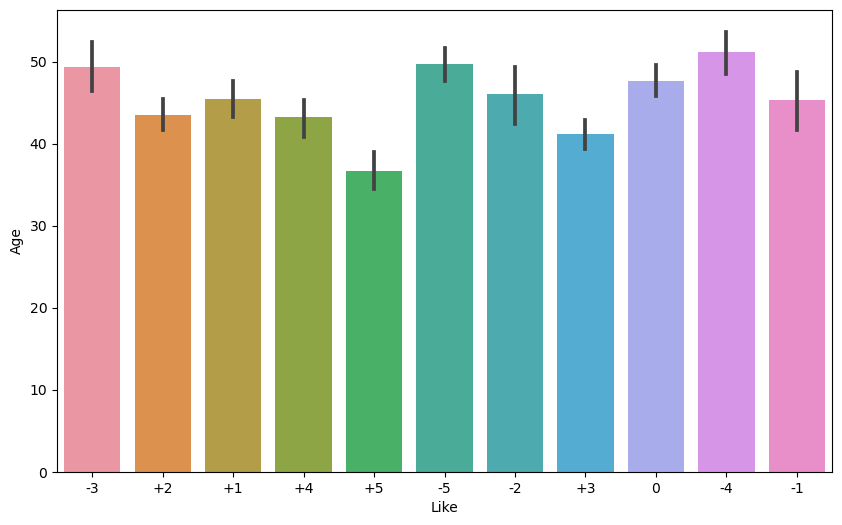

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x="Like", y="Age", data=data)
plt.show

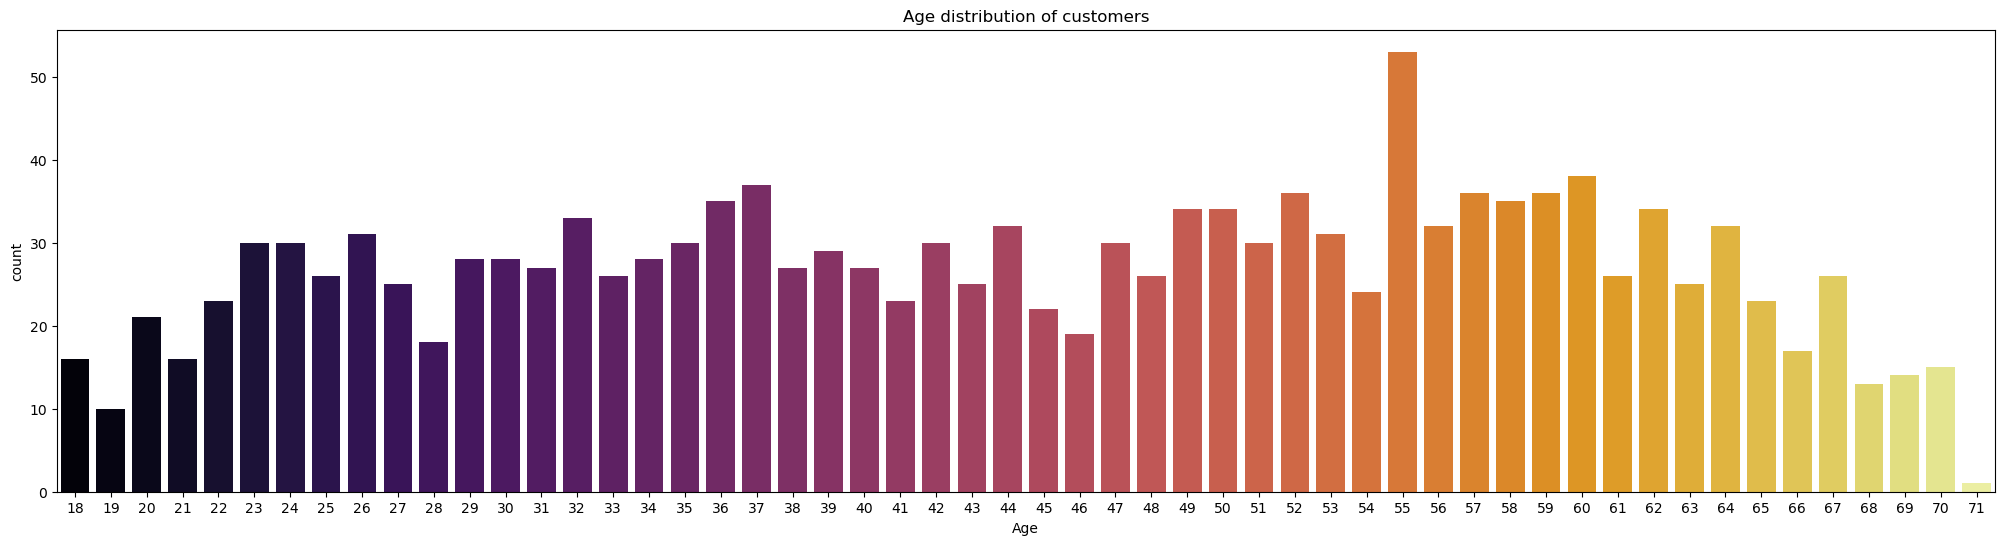

In [32]:
plt.figure(figsize=(25,6))
f = sns.countplot(x=data['Age'],palette = 'inferno')
plt.title('Age distribution of customers')
plt.show()

In [36]:
#PCA

from sklearn.decomposition import PCA
from sklearn import preprocessing
pca_data = preprocessing.scale(array)
pca = PCA(n_components=11)
pc = pca.fit_transform(array)
names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
principal = pd.DataFrame(data = pc, columns = names)
principal

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [38]:
pca.explained_variance_ratio_


array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [40]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [41]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_data = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_data['variable'] = data.iloc[:,:11].columns.values
loadings_data = loadings_data.set_index('variable')
loadings_data

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


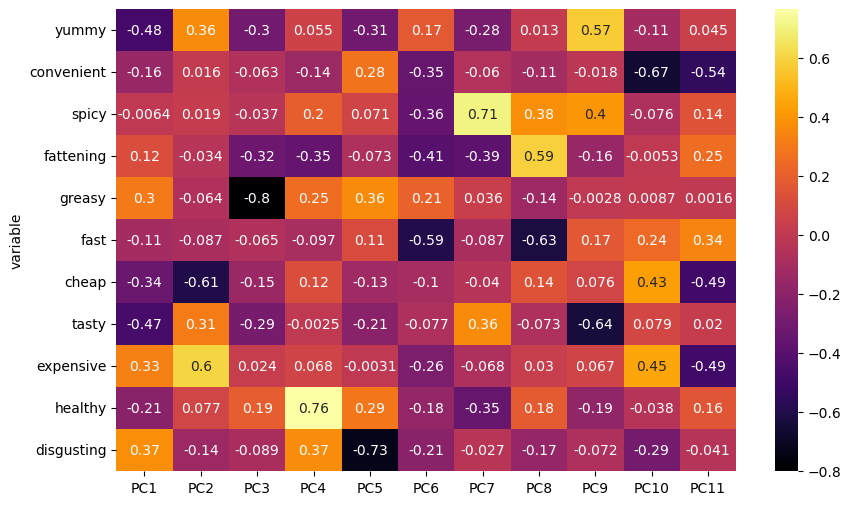

In [42]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(loadings_data, annot=True, cmap='inferno')
plt.show()

In [43]:
pip install bioinfokit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


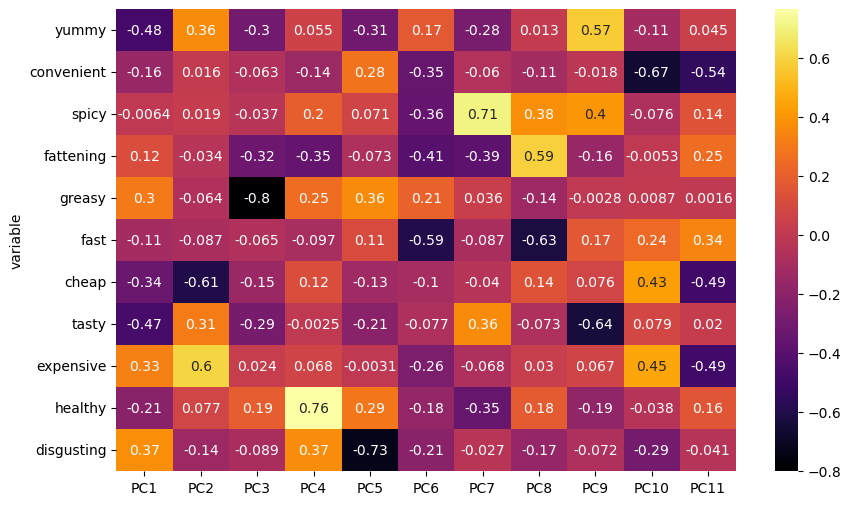

In [45]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(loadings_data, annot=True, cmap='inferno')
plt.show()

In [46]:
pip install bioinfokit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


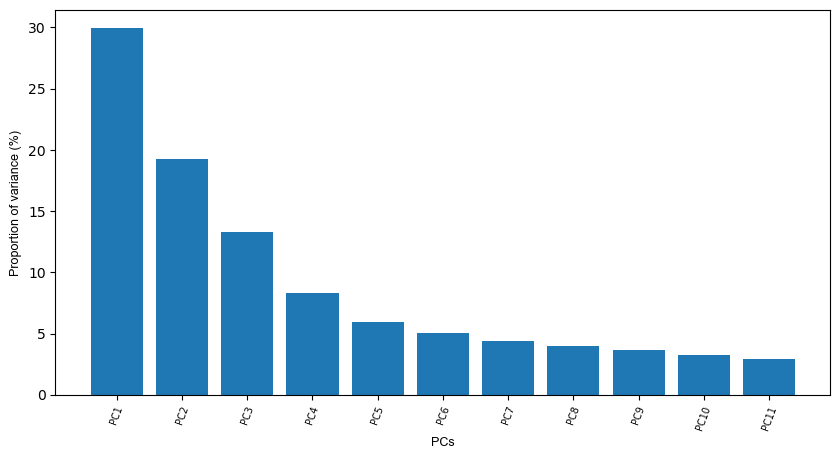

In [47]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

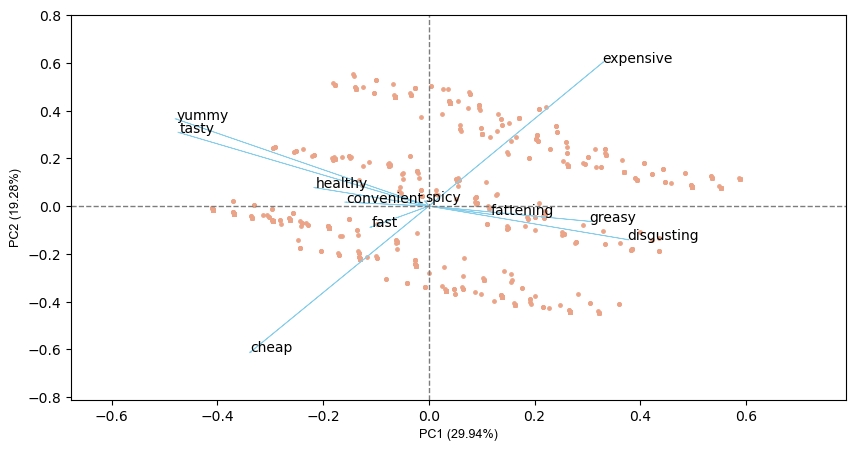

In [48]:
pca_scores = PCA().fit_transform(array)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [49]:
# K Means
from sklearn.cluster import KMeans

In [51]:
errors = []
data_scaled = (r - r.mean()) / r.std()
k_values = range(1, 11)
errors = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    errors.append(model.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

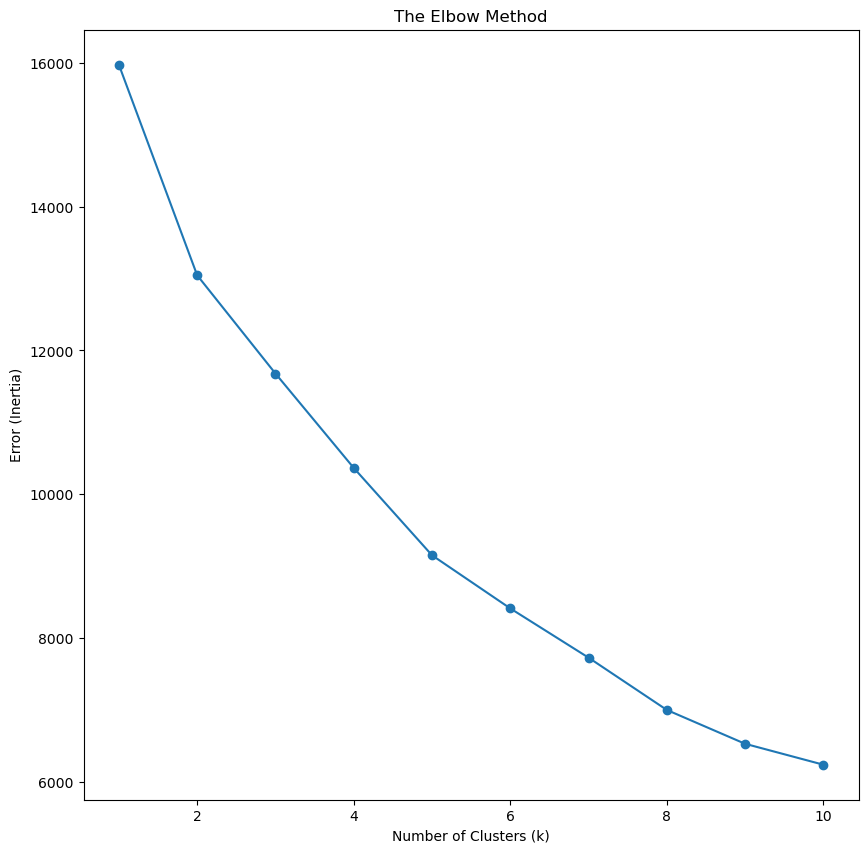

In [53]:
plt.plot(k_values, errors, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Error (Inertia)')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

In [54]:
check = data.assign(ClusterLabel = model.labels_)
check.groupby("ClusterLabel")["Age"].median()


ClusterLabel
0    44.0
1    49.0
2    51.0
3    52.0
4    38.0
5    50.0
6    32.5
7    43.0
8    49.5
9    56.0
Name: Age, dtype: float64

In [55]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(r)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [56]:
data['cluster_num'] = kmeans.labels_
print ('Labels:', kmeans.labels_)
print ('WCSS:', kmeans.inertia_)
print('No. of iterations: ', kmeans.n_iter_)
print('Cluster centroids: ', kmeans.cluster_centers_)

Labels: [3 1 4 ... 4 2 0]
WCSS: 1434.606097191478
No. of iterations:  5
Cluster centroids:  [[2.15517241e-02 6.85344828e-01 8.62068966e-02 9.35344828e-01
  7.32758621e-01 7.54310345e-01 6.89655172e-02 8.62068966e-02
  9.22413793e-01 6.03448276e-02 7.37068966e-01]
 [7.92880259e-01 9.80582524e-01 1.22977346e-01 9.70873786e-01
  1.00000000e+00 9.48220065e-01 8.93203883e-01 9.54692557e-01
  1.06796117e-01 1.81229773e-01 1.71521036e-01]
 [8.46547315e-01 9.76982097e-01 9.20716113e-02 7.10997442e-01
  0.00000000e+00 9.64194373e-01 8.84910486e-01 9.66751918e-01
  3.06905371e-02 3.75959079e-01 1.53452685e-02]
 [3.78787879e-03 8.71212121e-01 6.43939394e-02 9.01515152e-01
  5.75757576e-01 9.35606061e-01 8.78787879e-01 3.78787879e-03
  1.51515152e-02 8.33333333e-02 4.01515152e-01]
 [8.59922179e-01 9.53307393e-01 9.72762646e-02 8.83268482e-01
  5.21400778e-01 8.40466926e-01 3.33066907e-16 9.41634241e-01
  1.00000000e+00 1.94552529e-01 6.61478599e-02]]


In [59]:
from collections import Counter

Cluster size:  Counter({2: 391, 1: 309, 3: 264, 4: 257, 0: 232})


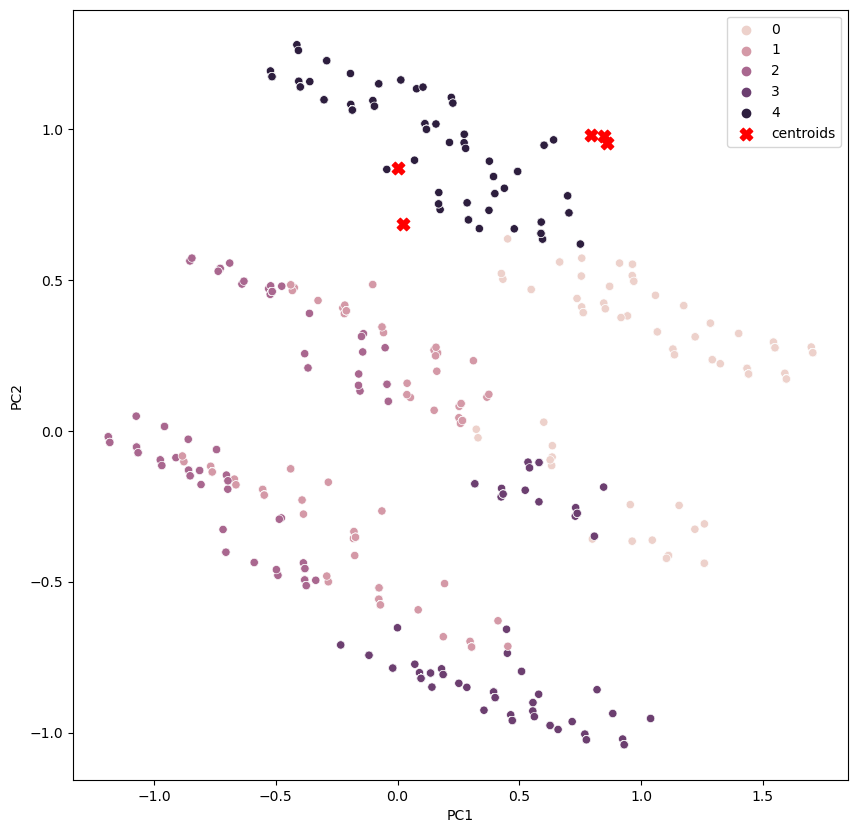

In [61]:
print('Cluster size: ', Counter(kmeans.labels_))
sns.scatterplot(data=principal, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend()
plt.show()

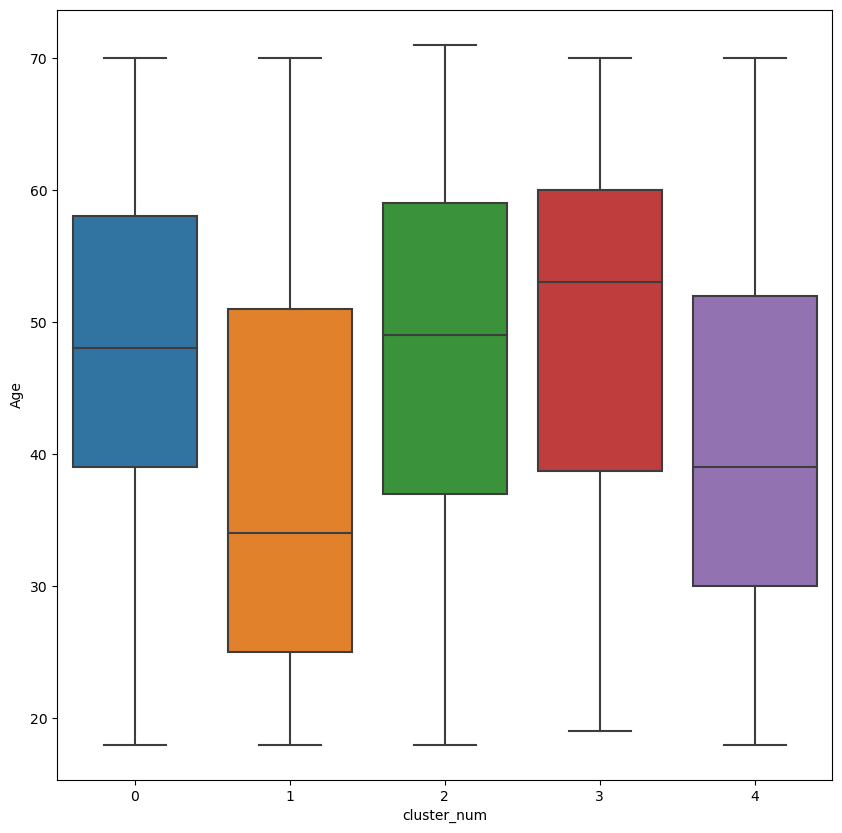

In [62]:
sns.boxplot(x="cluster_num", y="Age", data=data);

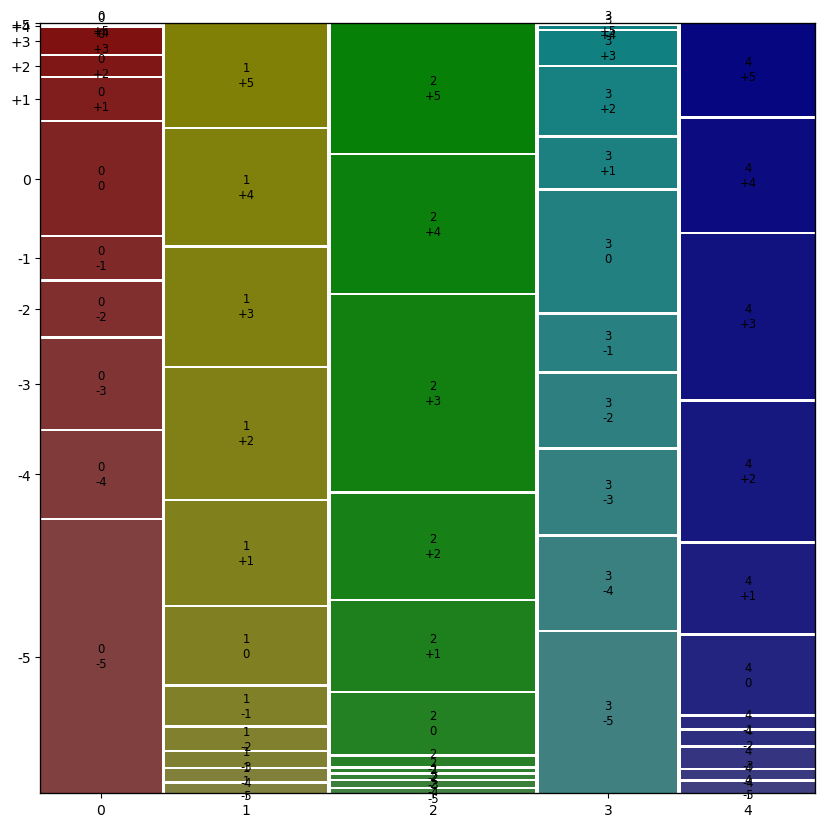

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,85,27,28,17,13,35,13,6,8,0,0
1,4,5,6,9,16,32,43,54,49,48,43
2,2,3,2,2,5,32,47,55,103,72,68
3,57,33,30,26,20,43,18,24,12,1,0
4,4,3,7,5,4,27,31,48,57,39,32


None

In [63]:
from statsmodels.graphics.mosaicplot import mosaic
crosstab = pd.crosstab(data['cluster_num'], data['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab
plt.rcParams['figure.figsize'] = (10,10)
mosaic(crosstab.stack())
display(crosstab, plt.show())

In [64]:
from sklearn.preprocessing import LabelEncoder
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.672414
1,1,2.653722
2,2,2.562660
3,3,2.742424
4,4,2.595331


In [65]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,7.396552
1,1,3.365696
2,2,2.971867
3,3,6.530303
4,4,3.252918


In [69]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender,Like,VisitFrequency
0,0,0.581897,7.396552,2.672414
1,1,0.417476,3.365696,2.653722
2,2,0.396419,2.971867,2.562660
3,3,0.416667,6.530303,2.742424
4,4,0.529183,3.252918,2.595331


In [70]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.581897,7.396552,2.672414
1,1,0.417476,3.365696,2.653722
2,2,0.396419,2.971867,2.562660
3,3,0.416667,6.530303,2.742424
4,4,0.529183,3.252918,2.595331


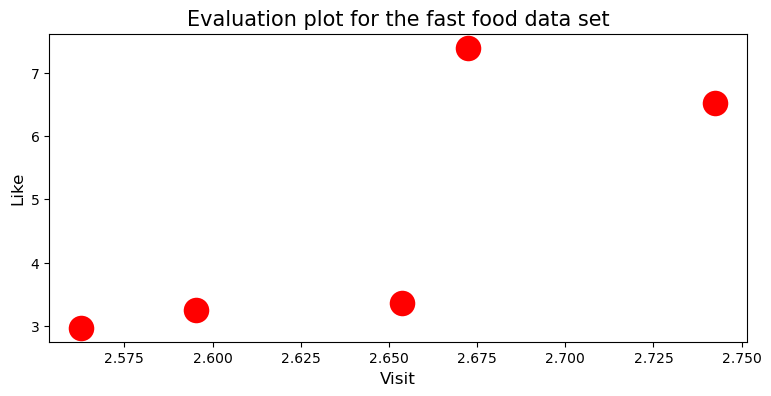

In [71]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()